# Clustering Part II

*In this tutorial we discuss **clustering methods, namely DBSCAN and hierachichal models** and make a small case study. Here we follow the code examples of* 

*    **Aurelion Geron "Hand-on Machine Learning with Scikit-Learn, Keras, and TensorFlow"**, 
*    **Igual & Segui "Introduction to Data Science"** and 
*    **Mueller & Guido "Introduction to Machine Learning with Python**.

# Preamble

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# DBSCAN

DBSCAN stands for *Density-based spatial clustering of applications with noise*. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.

The density of clusters is based on the $\epsilon$-neightborhood concept. The $\epsilon$-neighborhood of a point $p$ in a dataset $d$ is given as:

\begin{equation}
N(p) = \{ q \in d | dist(p,q) \leq \epsilon \}
\end{equation}

We define a minimum density value of `MinPts` for a neighborhood to be considered part of a cluster. There are three possible descriptions for the data record $P$, which are core point (= located in dense regions), border/boundary point and noise (outlier) point.

## Fit

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state = 42, n_samples = 100)
# Set up DBSCAN parameters
dbscan = DBSCAN(eps=0.2, min_samples=18)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=18, n_jobs=None, p=None)

Here

*    min_samples: number of instances that form a **core instance**
*    eps: $\epsilon$-neighborhood, i.e. how many instances are located within a small neighbourhood

In [12]:
dbscan.labels_[:10]

array([0, 1, 2, 1, 0, 1, 2, 1, 1, 2], dtype=int64)

The label -1 stands for noise, which means that they are considered as **anomalies** by the algorithm.

In [13]:
(dbscan.labels_ == -1).sum()/len(dbscan.labels_)

1.0

In [ ]:
dbscan = DBSCAN(eps=2.0, min_samples=3)
dbscan.fit(X)

In [5]:
dbscan = DBSCAN(eps=2.0, min_samples=3)
dbscan.fit(X)
print((dbscan.labels_ == -1).sum()/len(dbscan.labels_))

0.0


Indices of the core instances are available in the `core_sample_indices_`instance variable.

In [6]:
dbscan.core_sample_indices_[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

The core instances are available in the `components_`instance variable:

In [16]:
dbscan.components_[:20]

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851]])

In [7]:
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
core_mask    

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [8]:
dbscan.core_sample_indices_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [15]:
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

3

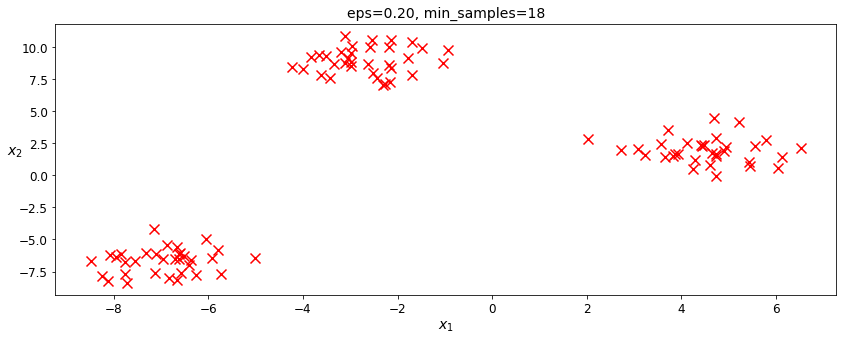

In [76]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(14, 5))
plot_dbscan(dbscan, X, size=100)
plt.show()

## Understanding eps and min_samples

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

# create a smooth transition from the first to to the second color of cm3
# similar to RdBu but with our red and blue, also not going through white,
# which is really bad for greyscale

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)


def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.

    Parameters
    ----------

    x1 : nd-array
        input data, first axis

    x2 : nd-array
        input data, second axis

    y : nd-array
        input data, discrete labels

    cmap : colormap
        Colormap to use.

    markers : list of string
        List of markers to use, or None (which defaults to 'o').

    s : int or float
        Size of the marker

    padding : float
        Fraction of the dataset range to use for padding the axes.

    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines



def plot_dbscan():
    X, y = make_blobs(random_state=0, n_samples=12)

    dbscan = DBSCAN()
    clusters = dbscan.fit_predict(X)
    clusters

    fig, axes = plt.subplots(3, 4, figsize=(11, 8),
                             subplot_kw={'xticks': (), 'yticks': ()})
    # Plot clusters as red, green and blue, and outliers (-1) as white
    colors = [cm3(1), cm3(0), cm3(2)]
    markers = ['o', '^', 'v']

    # iterate over settings of min_samples and eps
    for i, min_samples in enumerate([2, 3, 5]):
        for j, eps in enumerate([1, 1.5, 2, 3]):
            # instantiate DBSCAN with a particular setting
            dbscan = DBSCAN(min_samples=min_samples, eps=eps)
            # get cluster assignments
            clusters = dbscan.fit_predict(X)
            print("min_samples: %d eps: %f  cluster: %s"
                  % (min_samples, eps, clusters))
            if np.any(clusters == -1):
                c = ['w'] + colors
                m = ['o'] + markers
            else:
                c = colors
                m = markers
            discrete_scatter(X[:, 0], X[:, 1], clusters, ax=axes[i, j], c=c,
                             s=8, markers=m)
            inds = dbscan.core_sample_indices_
            # vizualize core samples and clusters.
            if len(inds):
                discrete_scatter(X[inds, 0], X[inds, 1], clusters[inds],
                                 ax=axes[i, j], s=15, c=colors,
                                 markers=markers)
            axes[i, j].set_title("min_samples: %d eps: %.1f"
                                 % (min_samples, eps))
    fig.tight_layout()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


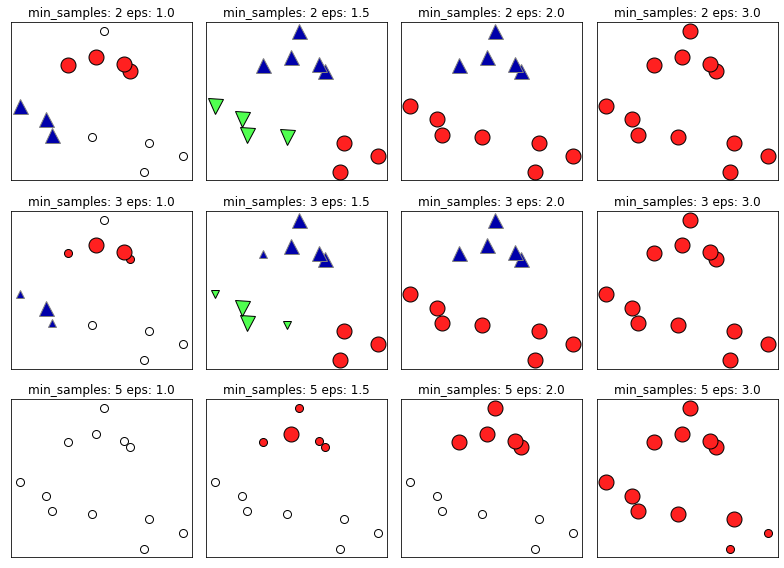

In [19]:
plot_dbscan()

## Predict

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which cluster a new
instance belongs to. This implementation decision was made because different classification
algorithms can be better for different tasks, so the authors decided to let the
user choose which one to use. Moreover, it’s not hard to implement. For example, let’s
train a KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [21]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 1, 1, 1], dtype=int64)

In [22]:
knn.predict_proba(X_new)

array([[0.16, 0.66, 0.18],
       [0.08, 0.66, 0.26],
       [0.12, 0.66, 0.22],
       [0.  , 0.66, 0.34]])

## Outliers

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any
number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters
(eps and min_samples).

In [77]:
# if the label equals “-1”, this means the data record is an outlier.
# find the outliers
# outliers = X[labels_ == -1]
# outliers

# Hierarchical Clustering

The hierachy of clusters is represented as a tree. The tree is usually called a dendrogram. The root of the dendrogram is the single cluster that contains all the samples. The leaves are clusters containing only one sample each.

In general, there are two types of hierachical clustering:

*    Top-down: start with all data in a single cluster; **divide** the cluster

*    Botton-up: start with each data point in a sinlge cluster; **join** pair of clusters

The **linkage criterion** determines the metric used fro the cluster merging strategy:

*    Maximum or complete linkage minimizes the maximumdistance between observations of pairs of clusters.
*    Average linkage minimizes the average of the distances between all observations of pairs of clusters
*    Ward linkage minimizes the sum of squared differences within all clusters

In [25]:
MAXN1 =500
MAXN2 =400
MAXN3 =300

X1 = np.concatenate ([2.25*np.random.randn(MAXN1,2),4+1.7* np.random.randn (MAXN2 ,2)])
X1 = np.concatenate ([X1,[8,3]+1.9* np.random.randn(MAXN3 ,2)])
y1 = np.concatenate ([ np.ones ((MAXN1,1)),2* np.ones((MAXN2,1))])
y1 = np.concatenate ([y1,3* np.ones((MAXN3,1))]).ravel()
y1 = np.int_(y1)
labels_y1=['+','*','o']
colors=['r','g', 'b']

Let us apply agglomerative clustering using the different linkages:

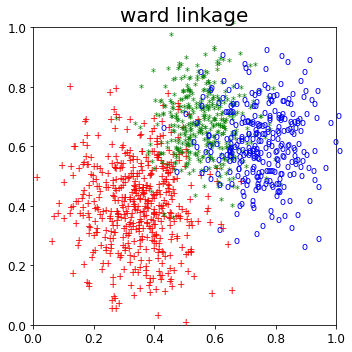

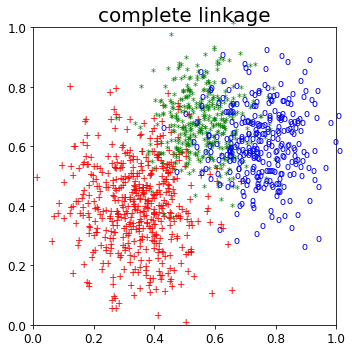

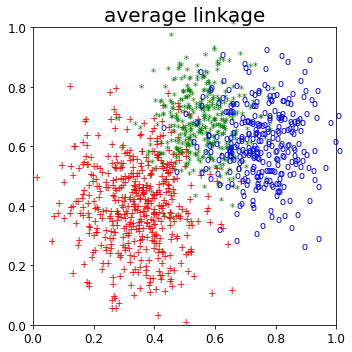

In [26]:
import time

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'complete', 'average'):
    clustering = AgglomerativeClustering(linkage=linkage,n_clusters =3)
    clustering.fit(X1)
    
    x_min , x_max = np.min (X1, axis =0) , np.max (X1,axis =0)
    X1 = (X1 - x_min ) / ( x_max - x_min )
    fig = plt.figure ()
    fig.set_size_inches((5,5))
    for i in range (X1.shape [0]) :
        plt.text(X1[i,0],X1[i,1],labels_y1[y1[i]-1],color=colors[y1[i]-1])
    plt.title ("%s linkage" % linkage,size =20)
    plt.tight_layout()
    
plt.show()


Agglomerative clustering has a “rich get richer” behavior that leads to *uneven cluster sizes*. In this regard, complete linkage is the worst strategy, and *Ward* gives the most regular sizes. 

Ward linkage is an attempt to form clusters that are as compact
as possible, since it considers inter- and intra-distances of the clusters.

Agglomerative clustering can scale to a large number of samples when it is used
jointly with a connectivity matrix, but it is computationally expensive when no connectivity constraints are added between samples: it considers all the possible merges
at each step.

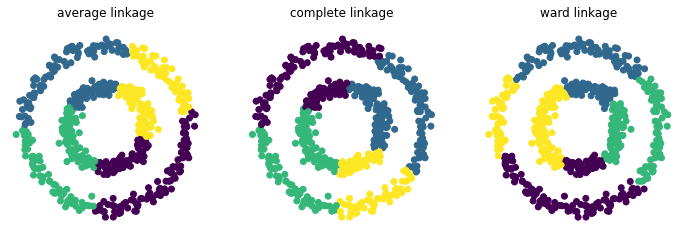

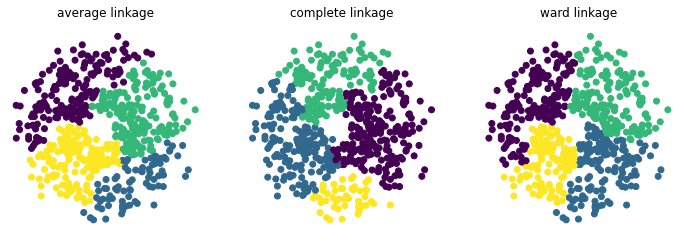

In [31]:
from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering

[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.05)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.15)

n_clusters=4

for X in [X1,X2]:
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_)#, cmap=plt.cm.spectral)
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    
    plt.show()

An interesting aspect of Agglomerative Clustering is that connectivity constraints can be added to this algorithm (only adjacent clusters can be merged together), through a connectivity matrix that defines for each sample the neighboring samples following a given structure of the data. For instance, in the swiss-roll example below, the connectivity constraints forbid the merging of points that are not adjacent on the swiss roll, and thus avoid forming clusters that extend across overlapping folds of the roll.

These constraints are useful to *impose a certain local structure*, but they also make the algorithm **faster**, especially when the number of the samples is high.
The connectivity constraints are imposed via a **connectivity matrix**: a scipy sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected. 

This matrix can be constructed from *a-priori information*: for instance, you may wish to cluster web pages by only merging pages with a *link pointing from one to another*. 

It can also be learned from the data, for instance using sklearn.neighbors.kneighbors_graph to restrict merging to nearest neighbors as in this example, or using sklearn.feature_extraction.image.grid_to_graph to enable only merging of neighboring pixels on an image.

This example shows the effect of imposing a connectivity graph to capture local structure in the data. The graph is simply the graph of 20 nearest neighbors.
Two consequences of imposing a connectivity can be seen. First clustering with a connectivity matrix is much faster.
Second, when using a connectivity matrix, average and complete linkage are unstable and tend to create a few clusters that grow very quickly. Indeed, average and complete linkage fight this percolation behavior by considering all the distances between two clusters when merging them. The connectivity graph breaks this mechanism. This effect is more pronounced for very sparse graphs (try decreasing the number of neighbors in kneighbors_graph) and with complete linkage. In particular, having a very small number of neighbors in the graph, imposes a geometry that is close to that of single linkage, which is well known to have this percolation instability.

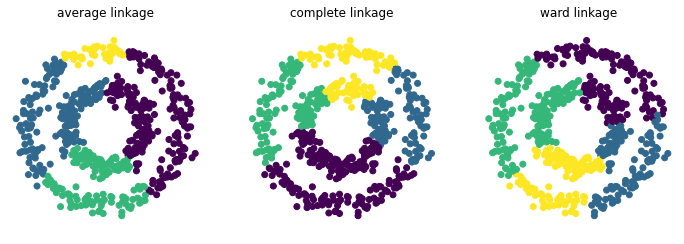

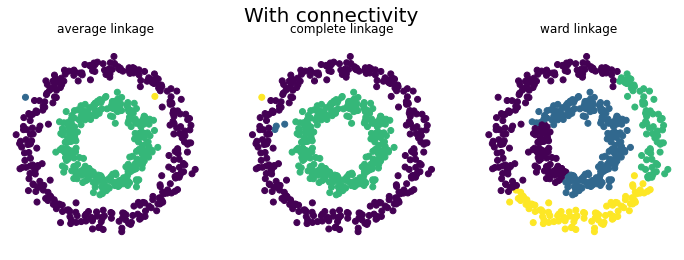

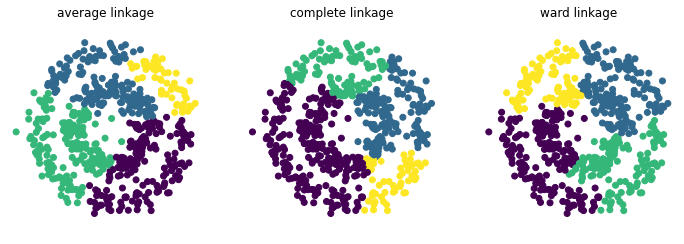

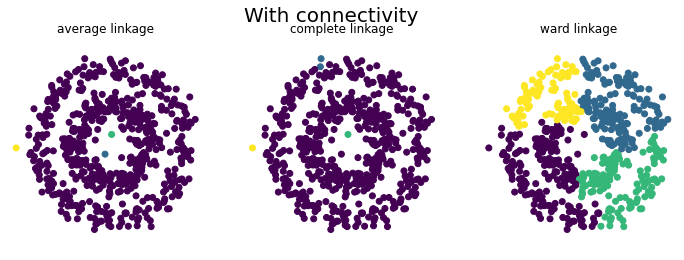

In [34]:
from sklearn.neighbors import kneighbors_graph

[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.07)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.1)

for X in [X1,X2]:
    knn_graph = kneighbors_graph(X, 5)
    for connectivity in (None, knn_graph):
        plt.figure(figsize=(12, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters, 
                                            connectivity=connectivity)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_)#, cmap=plt.cm.spectral)
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    if connectivity is None:
        plt.suptitle('Without connectivity', size=20)
    else: plt.suptitle('With connectivity', size=20)
    # plt.suptitle('Without connectivity: %r' % connectivity is None, size=20)
    plt.show()

# Clustering - Case Study

Eurostat is the home of the [European Commission data](http://ec.europa.eu/eurostat). Eurostat’s main role is to process and publish comparable statistical information at European level. Data in Eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions).

## Applying clustering to analyze countries according to their education resourses

In order to illustrate the clustering on a real dataset, we will analyze the indicators on education finance data among the European member states, provided by the Eurostat data bank2. The data is organized by year (TIME): [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011] and country (GEO): ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']. Twelve indicators (INDIC ED) on education finance with their values (Value) are given like: 

+ 1) Expenditure on educational institutions from private sources as % of Gross Domestic Product (GDP), for all levels of education combined; 
+ 2) Expenditure on educational institutions from public sources as \% of GDP, for all levels of government combined, 
+ 3) Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined, 
+ 4) Public subsidies to the private sector as \% of GDP, for all levels of education combined, 
+ 5) Public subsidies to the private sector as \% of total public expenditure, for all levels of education combined, etc. We can store in a table the 12 indicators for a given year (e.g. 2010).

In [35]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('./data/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


Data in CSV and databases are often organized in what is called **stacked** or **record** formats. In our case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`). Let us reshape the table into a feature vector style data set. 

To the process of reshaping stacked data into a table is sometimes called **pivoting**.

In [36]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                
     Cyprus                                                 1.41                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                
     Cyprus                                                 5.87                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    
     Cyprus                                                14.67                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          
     Cyprus                                                 0.73                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Austria                                                0.74                                                               
     Belgium  

In [38]:
print('Let us check the two indices:\n')
print('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten years information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity, let us focus on values on year 2010.

In [41]:
#Extract 2010 set of values
edu2010=pivedu.loc[2010]
edu2010.head()

INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


Let us clean and store the names of the features and the countries.

In [42]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'European Union (25 countries)': 'EU25',
                                'European Union (27 countries)': 'EU27',
                                'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
                                'Germany (until 1990 former territory of the FRG)': 'Germany'
                        })
features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(12)
edu2010.head()

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


As we can observe, this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

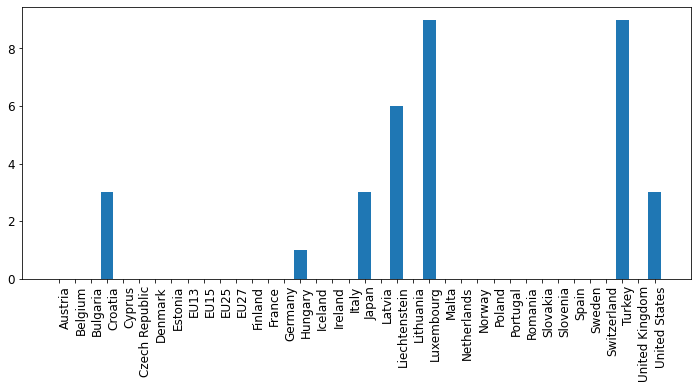

In [43]:
#Check what is going on in the NaN data 
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
           fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

We don't have info on Albania, Macedonia and Greece. And very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. Now let us check the features.

[1 0 3 0 3 0 0 0 0 0 0 3]


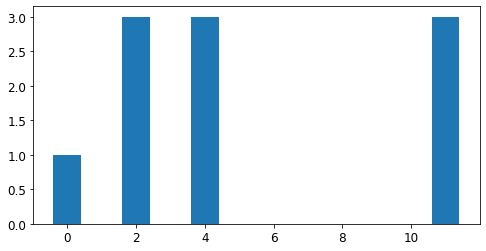

In [46]:
#Remove non info countries
wrk_countries = nan_countries<4

educlean=edu2010.loc[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print(na_features)

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

There are four features with missing data. At this point we can proceed in two ways:

+ **Fill in** the features with some non-informative, non-biasing data.
+ **Drop** the features with missing values.

If we have many features and only a few have missing values then it is not much harmful to drop them. However, if missing values are spread across the features, we have to eventually deal with them. In our case, both options seem reasonable, so we will proceed with both at the same time.

In [47]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print('Filled in data shape: ' + str(edufill.shape))

#Option B drops those features
edudrop=educlean.dropna(axis=1) 
         #dropna: Return object with labels on given axis omitted where alternately any or 
          # all of the data are missing
print('Drop data shape: ' + str(edudrop.shape))

Filled in data shape: (35, 12)
Drop data shape: (35, 8)


In the fill-in option, we have decided to fill the data with the mean value of the feature. This will not bias the distribution of the feature, though it has consequences in the interpretation of the results. 

Let us now apply a K-means clustering technique on this data in order to partition the countries according to their investment in education and check their profiles.

In [48]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
    
clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill) 
        #Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()

Let's visualize the result of the K-means clustering:

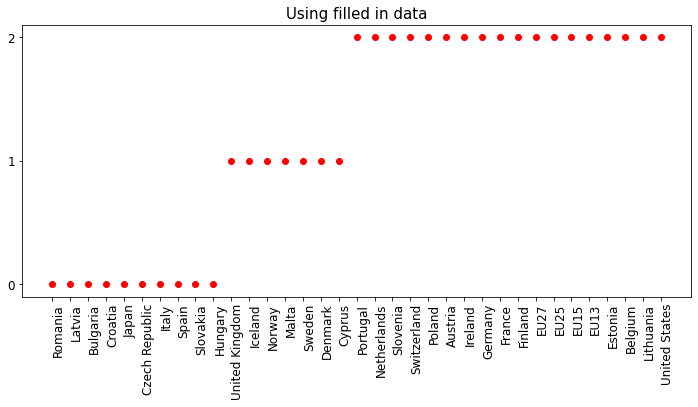

In [49]:
plt.plot(np.arange(35),y_pred_fill[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
plt.yticks([0,1,2])
fig = plt.gcf()

fig.set_size_inches((12,5))

Let's apply the clustering on the dataset with dropped missing values:

In [50]:
X_train_drop = edudrop.values
X_train_drop = scaler.fit_transform(X_train_drop)
    
clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

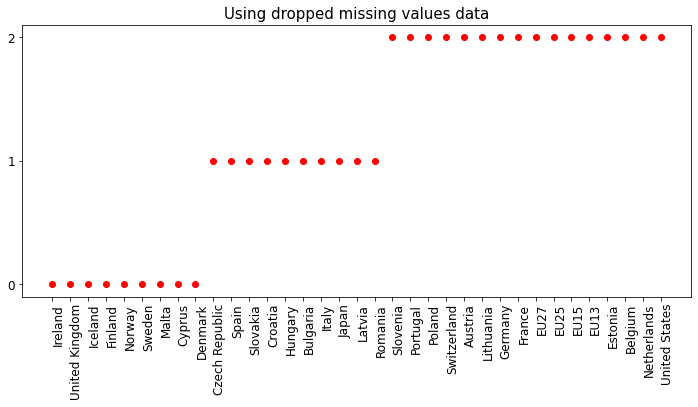

In [51]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))


We have sorted the data for better visualization. At a simple glance we can see that both partitions can be different. We can better check this effect plotting the clusters values of one technique against the other.

([<matplotlib.axis.YTick at 0x20f5a41cf60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

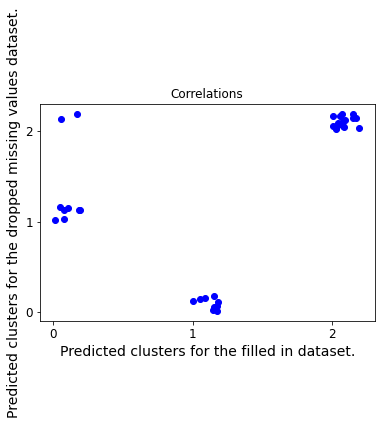

In [52]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])

Well, looking at both methods, both may yield the same results, but not necessarily always. This is mainly due to two aspects: the random initialization of the k-means clustering and the fact that each method works in a different space (dropped data vs filled-in data). 

Let us check the list of countries in both methods. Note that we should not consider the cluster value, since it is irrelevant.

In [53]:
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==0]))
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==0]))
print('\n')
print('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==1]))
print('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==1]))
print('\n')
print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==2]))
print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==2]))
print('\n')


Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']
Cluster 0: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']


Cluster 1: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']
Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']




Let us check the profile of the clusters by looking at the centroids:

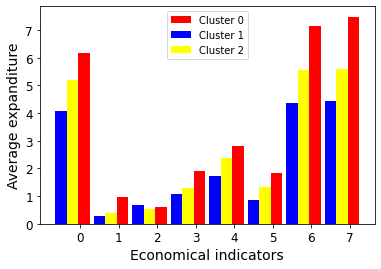

In [54]:
width=0.3
p1 = plt.bar(np.arange(8),scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b')
        # Scale back the data to the original representation
p2 = plt.bar(np.arange(8)+width,scaler.inverse_transform(clf.cluster_centers_[2]),
             width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,scaler.inverse_transform(clf.cluster_centers_[0]),
             width,color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()

It looks like cluster `1` spends more on education while cluster `0` is the one with less resources on education. (What about Spain?)

Let us refine a little bit more cluster `0` and check how close are members from this cluster to cluster `1`. This may give us a hint on a possible ordering. 

In [56]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean') 
                  #the distance of the elements of cluster 0 to the center of cluster 1

In [61]:
flatten = lambda l: [item for sublist in l for item in sublist]

np.arange(p.shape[0]),flatten(p)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [7.46482965065833,
  8.747808140713888,
  5.521048442140874,
  7.058551279965,
  5.527761779549717,
  5.389537096196451,
  5.269094036421207,
  5.2056670540497105,
  5.7384844427180814])

([<matplotlib.axis.XTick at 0x20f59b852e8>,
 [Text(0, 0, 'Cyprus'),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Finland'),
  Text(3, 0, 'Iceland'),
  Text(4, 0, 'Ireland'),
  Text(5, 0, 'Malta'),
  Text(6, 0, 'Norway'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'United Kingdom')])

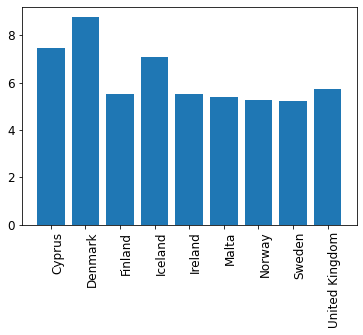

In [63]:
plt.bar(np.arange(p.shape[0]),flatten(p))

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)

Well, it seems that Spain belongs to cluster `0`, it is the closest to change to a policy in the lines of the other clusters.

Additionally, we can also check the distance to the centroid of cluster `0`.

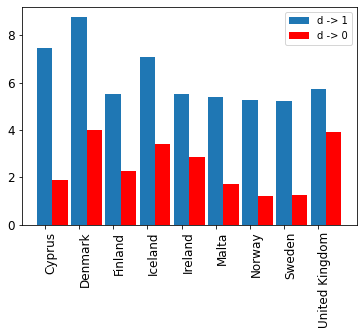

In [66]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
pown = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')

width=0.45
p0=plt.bar(np.arange(p.shape[0]),flatten(p),width)
p1=plt.bar(np.arange(p.shape[0])+width,flatten(pown),width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=1)


Let us redo the clustering with $K=4$ and see what we can conclude.

In [67]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

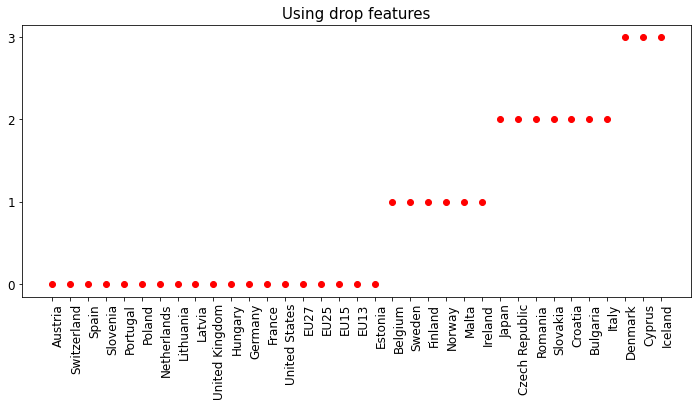

In [68]:
idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
           horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

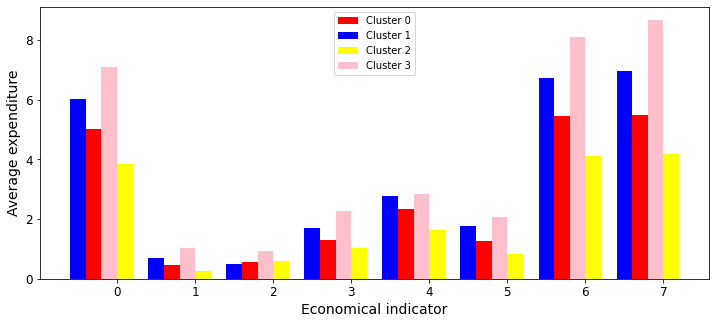

In [69]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2', 
                                           'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))

Spain is still in cluster `0`. But as we observed in our previous clustering it was very close to changing cluster. This time cluster `0` includes the averages values for the EU members. Just for the sake of completeness, let us write down the name of the countries in the clusters.

In [70]:
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2]))

print('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 1: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']
Cluster 2: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 3: 
['Cyprus', 'Denmark', 'Iceland']


We can repeat the process using the alternative clustering techniques and compare their results. Let us first apply the spectral clustering. The corresponding code will be:

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)
 
distances = euclidean_distances(edudrop.values)
    
spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)
 
y_pred = spectral.labels_.astype(np.int)

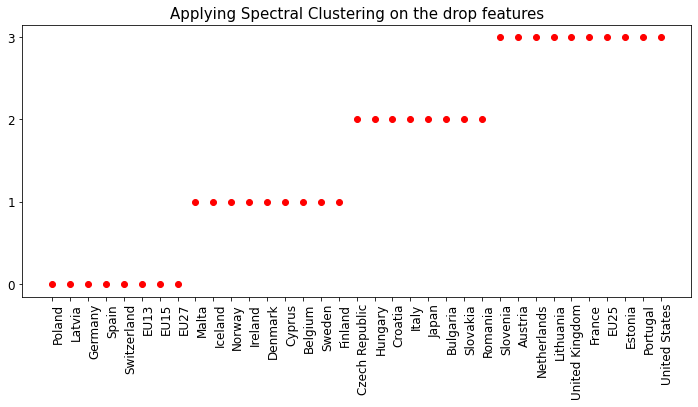

In [72]:
idx=y_pred.argsort()

plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] 
        for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

Note that in general, the spectral clustering intends to obtain more balanced clusters. In this way, the predicted cluster 1 merges the cluster 2 and 3 of the K-means clustering, cluster 2 corresponds to the cluster 1 of the K-means clustering, cluster 0 mainly goes to cluster 2, and clusters 3 corresponds to cluster 0 of the K-means.

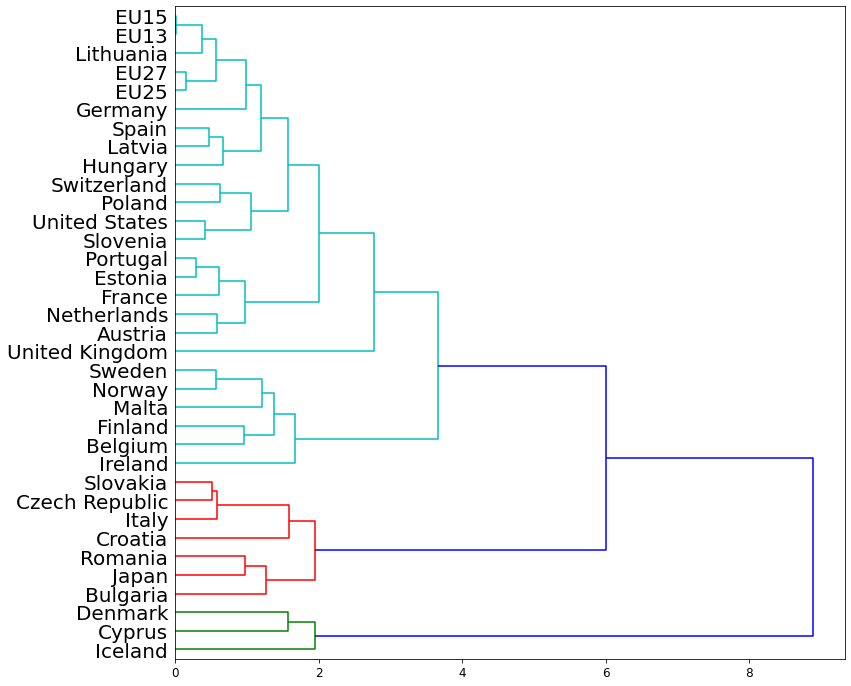

In [73]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);


# Theory and Concepts (to include)

## Distance Measures

## Metrics to Measure Clustering Quality

## General Considerations on Clustering Techniques